# Least-square fitting Testing 

**Purpose**: Code for testing the Autocorrelation and decorrelation scale functions on fake data

**Luke Colosi | lcolosi@ucsd.edu**

Force matplotlib plots to display directly within the output cell of the notebook: 

In [1]:
%matplotlib inline


Import python libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Set path to access python functions
sys.path.append('/Users/lukecolosi/Desktop/projects/graduate_research/Gille_lab/AirSeaCoupling/tools/')

#--- Luke's Python Functions ---# 
from lsf import detrend, unweighted_lsf

Generate fake data

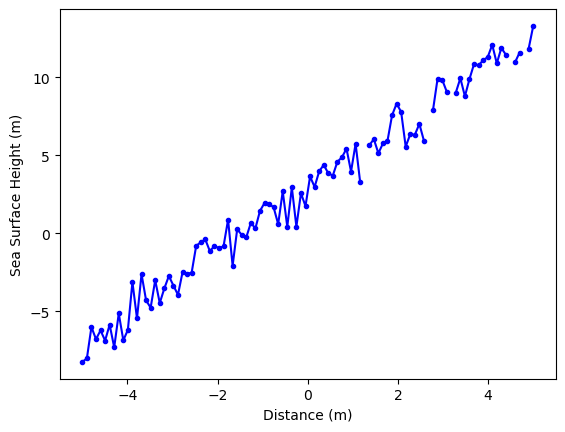

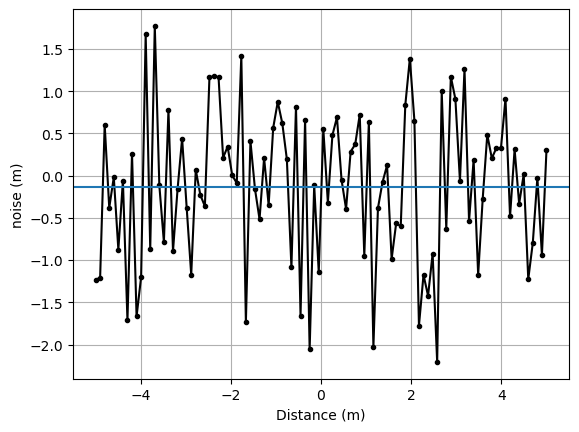

In [3]:
# Set independent variable 
L_tot = 10                 # Extent of signal, units: km
dx = 0.1                    # Time step intervals, units: seconds
N = int(np.round(L_tot/dx)) # Number of samples in the the record 
x = np.linspace(-L_tot/2,L_tot/2,N)

# Define slope and mean value 
y0 = 3; 
y1 = 2; 

# Generate normally distributed noise
mean = 0      
std_dev = 1
noise = np.random.normal(mean, std_dev, size=x.shape)

# Generat fake data 
data = y0 + y1*x + noise 

# Decide how many points to mask
num_masked = 5  

# Choose random indices to mask
masked_indices = np.random.choice(len(data), num_masked, replace=False)

# Create a masked array
data_m = np.ma.array(data, mask=np.zeros(data.shape, dtype=bool))
data_m.mask[masked_indices] = True

# Plot the time series 
plt.plot(x,data_m,'b.-')
plt.xlabel('Distance (m)')
plt.ylabel('Sea Surface Height (m)')
plt.show()
plt.grid()

# Plot the white noise
plt.plot(x,noise,'k.-')
plt.axhline(np.mean(noise))
plt.xlabel('Distance (m)')
plt.ylabel('noise (m)')
plt.show()
plt.grid()

Preform a linear regression on the data 

Regression : y0 = 2.8421610065567102, y1 = 1.993842945841142


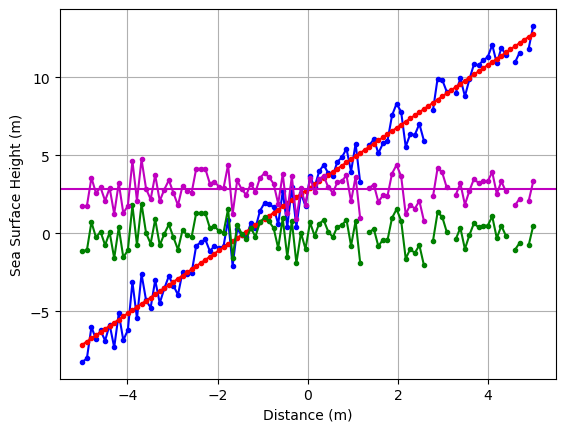

In [4]:
# Compute linear least squares fit
hfit, x_data, x_data_sigma, L2_norm = unweighted_lsf(data_m, x, parameters = 0, freqs = [], sigma = std_dev)

# Detrend time series 
data_detrend_rm = detrend(data_m,x,mean = 0)
data_detrend = detrend(data_m,x,mean = 1)

# Print both linear regressions
print('Regression : y0 = ' + str(x_data[0]) + ', y1 = ' + str(x_data[1]))

# Plot the time series 
plt.plot(x,data_m,'b.-')
plt.plot(x,hfit,'r.-')
plt.plot(x,data_detrend_rm,'g.-')
plt.plot(x,data_detrend,'m.-')
plt.axhline(x_data[0],color='m')
plt.xlabel('Distance (m)')
plt.ylabel('Sea Surface Height (m)')
plt.show()
plt.grid()


Generate fake data with low resolution independent variable

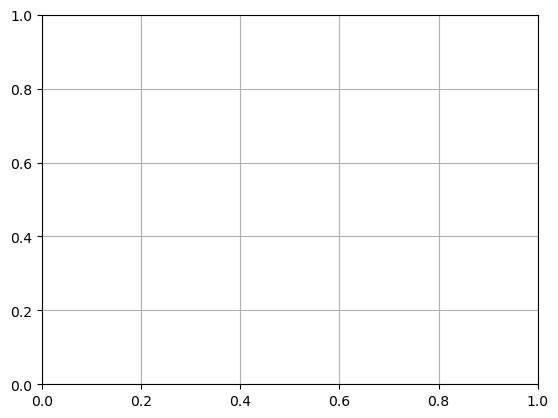

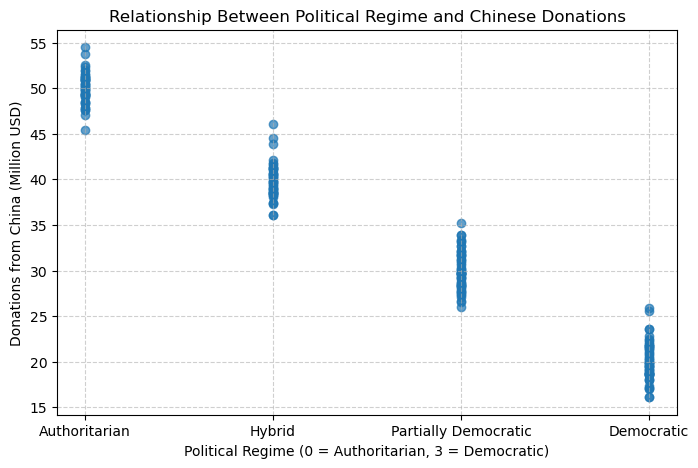

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate fake data for political regime (0 = authoritarian, 3 = democratic)
num_countries = 195  # Approximate number of countries in the world
political_regime = np.random.randint(0, 4, size=num_countries)  # Randomly assign regimes

# Set mean and slope of linear relationship with political regime and base donations
mean = 50           # Units: millions of USD
slope = 10          # Units: change in millions of USD per change in political regime

# Generate donations with a linear trend (more for authoritarian regimes)
base_donations = mean - slope * political_regime  # Linear decline as democracy increases
std_dev =  2 
noise = np.random.normal(0, std_dev, num_countries)  # Add some noise
donations = base_donations + noise
donations = np.maximum(donations, 0)  # Ensure donations are non-negative

# Make the donations a masked array 
donations = np.ma.array(donations)

# Print generated data
# for regime, donation in zip(political_regime, donations):
#     print(f"Political Regime: {regime}, Donations: {donation:.2f} million USD")

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(political_regime, donations, alpha=0.7)
plt.xlabel("Political Regime (0 = Authoritarian, 3 = Democratic)")
plt.ylabel("Donations from China (Million USD)")
plt.title("Relationship Between Political Regime and Chinese Donations")
plt.xticks([0, 1, 2, 3], ["Authoritarian", "Hybrid", "Partially Democratic", "Democratic"])
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

Regression : y0 = 49.95204797517082, y1 = -9.966876255517743


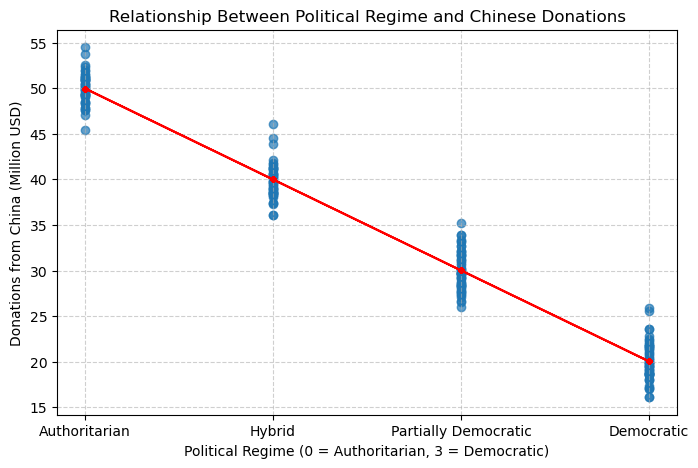

In [6]:
# Compute linear least squares fit
hfit, x_data, x_data_sigma, L2_norm = unweighted_lsf(donations, political_regime, parameters = 0, freqs = [], sigma = std_dev)

# Print both linear regressions
print('Regression : y0 = ' + str(x_data[0]) + ', y1 = ' + str(x_data[1]))

# Plot the time series 
plt.figure(figsize=(8, 5))
plt.scatter(political_regime, donations, alpha=0.7)
plt.plot(political_regime,hfit,'r.-')
plt.xlabel("Political Regime (0 = Authoritarian, 3 = Democratic)")
plt.ylabel("Donations from China (Million USD)")
plt.title("Relationship Between Political Regime and Chinese Donations")
plt.xticks([0, 1, 2, 3], ["Authoritarian", "Hybrid", "Partially Democratic", "Democratic"])
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

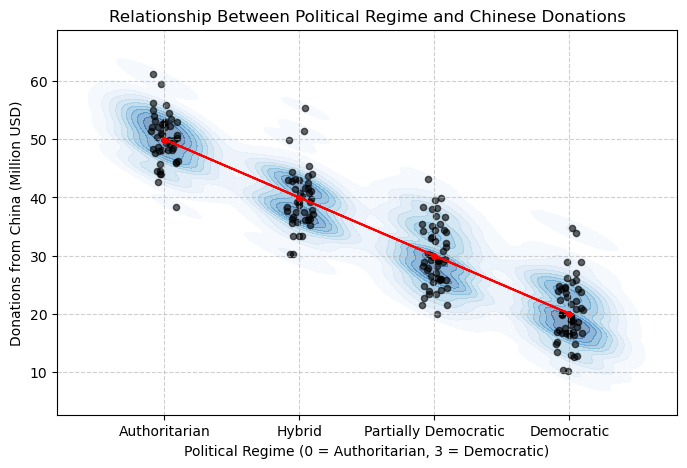

In [8]:
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate fake data for political regime (0 = authoritarian, 3 = democratic)
num_countries = 195  # Approximate number of countries in the world
political_regime = np.random.randint(0, 4, size=num_countries)  # Randomly assign regimes

# Generate donations with a linear trend (more for authoritarian regimes)
base_donations = 50 - 10 * political_regime  # Linear decline as democracy increases
noise = np.random.normal(0, 5, num_countries)  # Add some noise
donations = base_donations + noise
donations = np.maximum(donations, 0)  # Ensure donations are non-negative

# Add jitter to avoid overplotting
jittered_regime = political_regime + np.random.uniform(-0.1, 0.1, size=num_countries)

# Scatter plot with density estimation
plt.figure(figsize=(8, 5))
sns.kdeplot(x=jittered_regime, y=donations, cmap="Blues", fill=True, alpha=0.5, bw_adjust=0.5)
plt.scatter(jittered_regime, donations, alpha=0.6, color="black", edgecolors='k', s=20)
plt.plot(political_regime,hfit,'r.-')
plt.xlabel("Political Regime (0 = Authoritarian, 3 = Democratic)")
plt.ylabel("Donations from China (Million USD)")
plt.title("Relationship Between Political Regime and Chinese Donations")
plt.xticks([0, 1, 2, 3], ["Authoritarian", "Hybrid", "Partially Democratic", "Democratic"])
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic velocity data (1D turbulent field)
np.random.seed(42)  # For reproducibility
N = 10000  # Number of points
x = np.linspace(0, 10, N)  # Spatial positions
u = np.cumsum(np.random.randn(N))  # Simulated turbulent velocity field (random walk)

# Define separations (lags) for structure function calculation
lags = np.logspace(0.1, 3, num=50, dtype=int)  # Logarithmic spacing of lags

# Compute second-order structure function S_2(ℓ)
S1 = np.array([np.mean((u[:-lag] - u[lag:])**1) for lag in lags])
S2 = np.array([np.mean((u[:-lag] - u[lag:])**2) for lag in lags])
S3 = np.array([np.mean((u[:-lag] - u[lag:])**3) for lag in lags])
S4 = np.array([np.mean((u[:-lag] - u[lag:])**4) for lag in lags])

# Plotting
plt.figure(figsize=(8, 6))
#plt.plot(lags, S1, 'o-', label=r'$S_1(\ell) = \langle |u(x+\ell) - u(x)| \rangle$')
plt.loglog(lags, S2, 'o-', label=r'$S_2(\ell) = \langle |u(x+\ell) - u(x)|^2 \rangle$')
#plt.plot(lags, S3, 'o-', label=r'$S_3(\ell) = \langle |u(x+\ell) - u(x)|^3 \rangle$')
#plt.plot(lags, S4, 'o-', label=r'$S_4(\ell) = \langle |u(x+\ell) - u(x)|^4 \rangle$')
plt.xlabel(r'$\ell$ (Separation Distance)')
plt.ylabel(r'$S_2(\ell)$ (Velocity Increment Variance)')
plt.title('Second-Order Structure Function $S_2(\ell)$')
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x, u, '.-')
plt.xlabel(r'$\ell$ (Separation Distance)')
plt.ylabel(r'$S_2(\ell)$ (Velocity Increment Variance)')
plt.title('Second-Order Structure Function $S_2(\ell)$')
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

print(S3)